**Adam**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = np.random.randn(500,2)
theta = np.zeros(2)

In [ ]:
def loss_function(data,theta):

  m  = theta[0]
  b = theta[1]

  loss = 0

  for i in range (0,len(data)):
    x = data[i, 0]
    y = data[i, 1]

    y_hat = (m * x +  b)


    loss = loss + ((y - (y_hat) **2))

  mean_sq_loss = loss / float(len(data))

  return mean_sq_loss

def compute_gradients(data,theta):
  gradients = np.zeros(2)


  N = float(len(data))

  m = theta[0]
  b =theta [1]


  for i in range (len(data)):

    x = data[i, 0]
    y = data[i, 1]


    gradients[0] += -(2 / N)* x*(y - ((m*x)+b))
    gradients[1] += -(2/N) * x * (y - ((theta[0] * x) + b))


  epsilon = 1e-6

  gradients = np.divide(gradients, N + epsilon)


  return gradients


In [ ]:


def adam_optimizer(data, theta, num_iterations=1000, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):

    m_t = np.zeros(2)
    v_t = np.zeros(2)

    t = 0
    loss_history = []

    for iteration in range(num_iterations):
        t += 1
        gradients = compute_gradients(data, theta)


        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)


        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)


        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)


        loss = loss_function(data, theta)
        loss_history.append(loss)

    return loss_history, theta


In [ ]:
data = np.random.randn(500, 2)
theta = np.zeros(2)
loss_history, final_theta = adam_optimizer(data, theta)

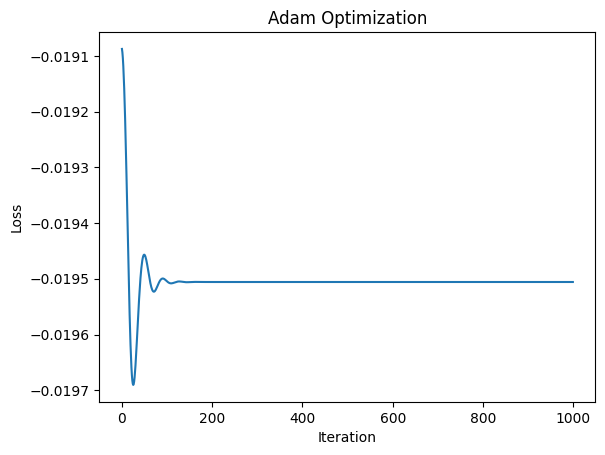

In [ ]:
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Adam Optimization')
plt.show()

In [ ]:
print(f"Final parameters: m = {final_theta[0]}, b = {final_theta[1]}")

Final parameters: m = -0.014197100091024735, b = -0.014197100091024735
